#  Exploratory Data Analysis – Heart Failure Dataset

In this notebook, we explore the dataset to understand what we’re dealing with before training any model: structure, missing values, basic stats, and first patterns linked to heart failure.
Goal: be sure our data is clean, consistent, and gives us intuition about the target.


In [83]:
import os
print(os.getcwd())


/Users/rania/Documents/GitHub/heart-failure-ml/data


In [84]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
#Chargement du dataset
df = pd.read_csv("heart_failure.csv")
print("Shape:", df.shape)
df.head()


Shape: (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [86]:
# We want to know the data types, and if there are missing values or inconsistencies.

df.info()

# count missing values for each column (if any)
print("\nMissing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB

Missing values per column:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dty

In [87]:
# describe the numeric columns to see global statistics
desc = df.describe().T
desc


,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205543,14.395829,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817714,154.011381,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [88]:
# check if there are any duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(" Duplicates removed.")
else:
    print("No duplicates found.")


Number of duplicated rows: 0
No duplicates found.


In [89]:
#look at our target column ("cardio") distribution
target_col = "cardio"
df[target_col].value_counts(normalize=True).round(3)


cardio
0    0.5
1    0.5
Name: proportion, dtype: float64

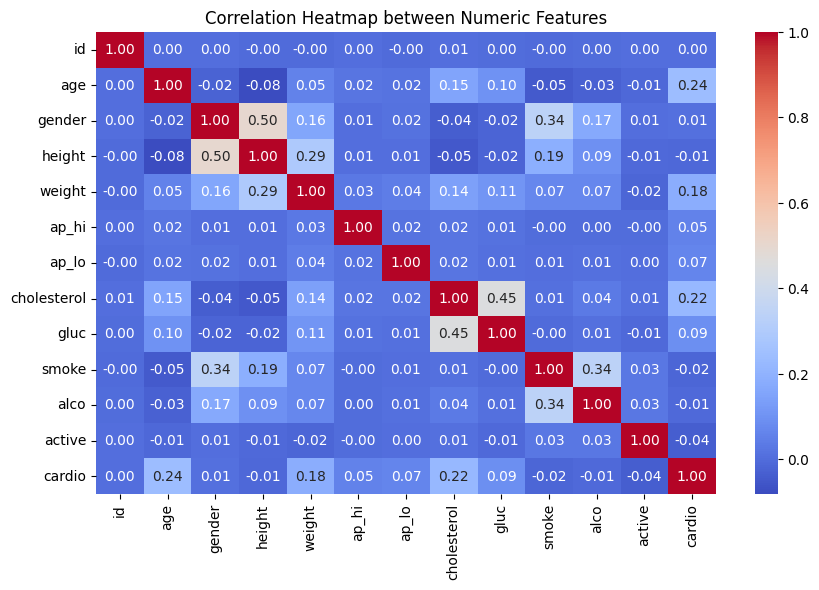

In [90]:
# visualize correlations between numeric features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap between Numeric Features")
plt.show()


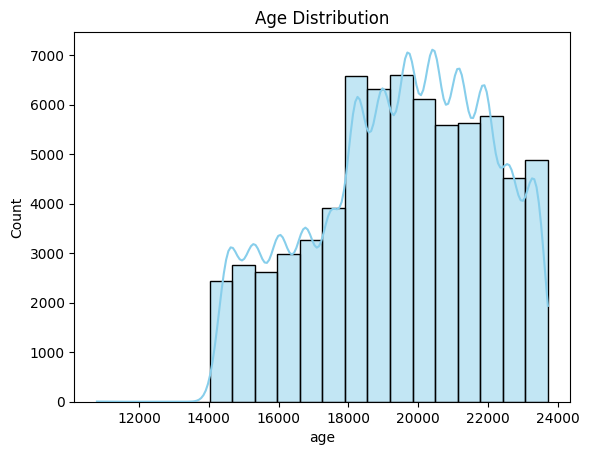

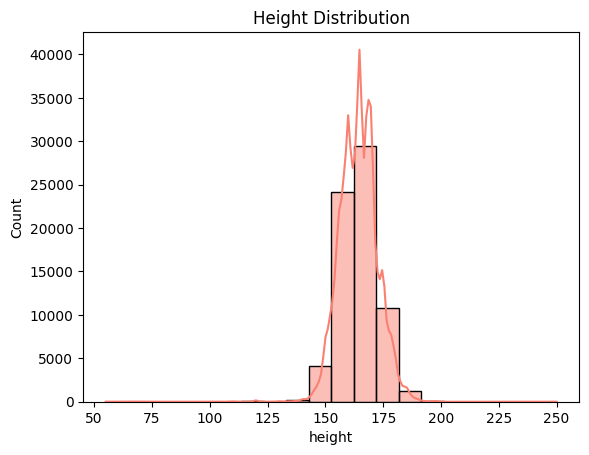

In [91]:
# Let's start visualizing key features
sns.histplot(df["age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

sns.histplot(df["height"], bins=20, kde=True, color="salmon")
plt.title("Height Distribution")
plt.show()


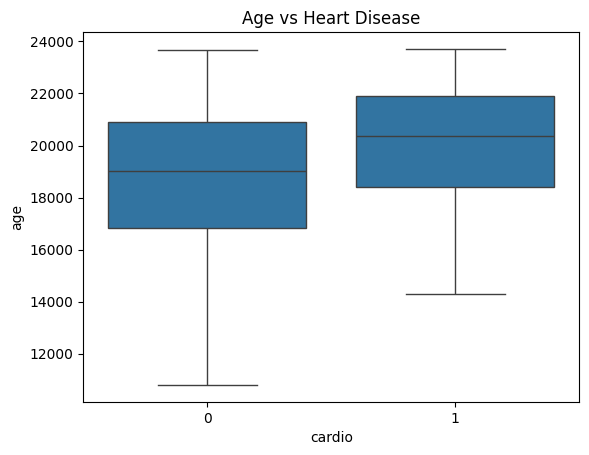

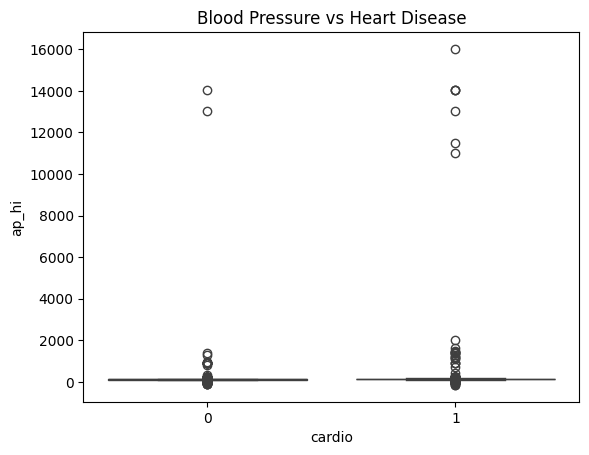

In [92]:
#compare the distribution of some variables between healthy and sick patients.
sns.boxplot(x="cardio", y="age", data=df)
plt.title("Age vs Heart Disease")
plt.show()

sns.boxplot(x="cardio", y="ap_hi", data=df)
plt.title("Blood Pressure vs Heart Disease")
plt.show()


## Summary of Observations

- The dataset contains **70,000 records and 13 features** — all numeric.  
-  **No missing values** and **no duplicates** were found.  
- The target variable `cardio` is **perfectly balanced** (50% positive, 50% negative).  
- **Age** and **blood pressure (ap_hi)** show higher values among patients with heart disease.  
- **Cholesterol** and **glucose** are also positively correlated with the presence of heart disease.  
- The correlation heatmap confirms strong links between `age`, `cholesterol`, and `cardio`.  
- Distributions look realistic overall, although some extreme values in `ap_hi` might be outliers to check later.  
- The dataset is clean and ready for the modeling phase.  

 Next step: build baseline models (Logistic Regression, Random Forest, etc.) and compare their performance.


In [93]:
# Save the cleaned dataset for the modeling phase
import os

#  We're saving our cleaned dataset so we can reuse it in the modeling phase.
# The code below automatically adapts the file path depending on where we run the notebook
# (we  might be in a different folder, so this avoids errors).

if os.getcwd().endswith("data"):
    output_path = "heart_failure_clean.csv"
else:
    output_path = "data/heart_failure_clean.csv"

df.to_csv(output_path, index=False)
print(f" Clean dataset saved successfully as {output_path}")


 Clean dataset saved successfully as heart_failure_clean.csv


In [94]:
df = pd.read_csv("heart_failure_clean.csv")


In [95]:
# Séparer les features et la target
X = df.drop(columns=["cardio"])  # Tout sauf la cible
y = df["cardio"]  # Variable cible

In [96]:
# Diviser en train/test (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [97]:
# Normaliser les données avec StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
#Implémenter le modèle baseline : Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


In [99]:
 # Entraîner le modèle
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [100]:
# Prédictions
y_pred = logreg.predict(X_test_scaled)

In [101]:
# Évaluer les performances
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [102]:
# Afficher les résultats
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

Accuracy: 0.714
Recall: 0.675
Precision: 0.732
F1-score: 0.702
ROC-AUC: 0.714


In [103]:
#Importer Random Forest et entraîner le modèle sur les données préparées
from sklearn.ensemble import RandomForestClassifier

# Entraîner le modèle RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [104]:
#Faire des prédictions sur les données test
y_pred_rf = rf.predict(X_test_scaled)


In [105]:
#Évaluer les performances du modèle RandomForest :
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.3f}")
print(f"Random Forest Recall: {recall_rf:.3f}")
print(f"Random Forest Precision: {precision_rf:.3f}")
print(f"Random Forest F1-score: {f1_rf:.3f}")
print(f"Random Forest ROC-AUC: {roc_auc_rf:.3f}")


Random Forest Accuracy: 0.722
Random Forest Recall: 0.698
Random Forest Precision: 0.733
Random Forest F1-score: 0.715
Random Forest ROC-AUC: 0.722


In [106]:
# Importer le modèle RandomForest
from sklearn.ensemble import RandomForestClassifier



In [107]:
# Entraîner le modèle RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [108]:
# Prédictions avec RandomForest
y_pred_rf = rf.predict(X_test_scaled)


In [109]:
# Évaluer les performances avec les métriques standards
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

In [110]:
# Afficher les résultats
print(f"Accuracy: {accuracy_rf:.3f}")
print(f"Recall: {recall_rf:.3f}")
print(f"Precision: {precision_rf:.3f}")
print(f"F1-score: {f1_rf:.3f}")
print(f"ROC-AUC: {roc_auc_rf:.3f}")

Accuracy: 0.722
Recall: 0.698
Precision: 0.733
F1-score: 0.715
ROC-AUC: 0.722


In [111]:
from sklearn.neighbors import KNeighborsClassifier


In [112]:
# Créer et entraîner le modèle KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [113]:
# Prédictions
y_pred_knn = knn.predict(X_test_scaled)

In [114]:
# Évaluer les performances
accuracy = accuracy_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
roc_auc = roc_auc_score(y_test, y_pred_knn)


In [115]:
# Afficher les résultats
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

Accuracy: 0.628
Recall: 0.608
Precision: 0.633
F1-score: 0.620
ROC-AUC: 0.628


In [116]:
from sklearn.model_selection import GridSearchCV


In [117]:
#Paramètres à tester pour le Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'arbres
    'max_depth': [10, 20, 30],         # Profondeur des arbres
    'min_samples_split': [2, 5, 10],   # Nombre minimum d'échantillons requis pour diviser un noeud
    'min_samples_leaf': [1, 2, 4]      # Nombre minimum d'échantillons requis pour être dans une feuille
}

In [118]:
# Appliquer GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Validation croisée avec 5 plis
                           scoring='accuracy',  # Critère de sélection : précision
                           n_jobs=-1)  # Utiliser tous les cœurs de processeur disponibles


In [ ]:
# Entraîner GridSearchCV
grid_search.fit(X_train_scaled, y_train)

In [ ]:
# Meilleurs paramètres
#print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
# Meilleur modèle
#best_rf_model = grid_search.best_estimator_


In [122]:
#Prédictions avec le meilleur modèle
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

In [125]:
# Évaluer les performances
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, y_pred_best_rf)

In [126]:
# Afficher les résultats
print(f"Optimized Random Forest - Accuracy: {accuracy_best_rf:.3f}")
print(f"Optimized Random Forest - Recall: {recall_best_rf:.3f}")
print(f"Optimized Random Forest - Precision: {precision_best_rf:.3f}")
print(f"Optimized Random Forest - F1-score: {f1_best_rf:.3f}")
print(f"Optimized Random Forest - ROC-AUC: {roc_auc_best_rf:.3f}")

Optimized Random Forest - Accuracy: 0.731
Optimized Random Forest - Recall: 0.682
Optimized Random Forest - Precision: 0.756
Optimized Random Forest - F1-score: 0.717
Optimized Random Forest - ROC-AUC: 0.731


In [127]:
#tester avec RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [128]:
# Paramètres à tester pour le Random Forest
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [130]:
# Appliquer RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10,  # Nombre de configurations à tester
                                   cv=5,  # Validation croisée avec 5 plis
                                   scoring='accuracy',  # Critère de sélection : précision
                                   n_jobs=-1,  # Utiliser tous les cœurs de processeur disponibles
                                   random_state=42)


In [131]:
# Entraîner RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [132]:
# Meilleurs paramètres
print("Best parameters:", random_search.best_params_)

Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}


In [133]:
# Meilleur modèle
best_rf_model_random = random_search.best_estimator_

In [134]:
# Prédictions avec le meilleur modèle
y_pred_best_rf_random = best_rf_model_random.predict(X_test_scaled)

In [135]:
# Évaluer les performances
accuracy_best_rf_random = accuracy_score(y_test, y_pred_best_rf_random)
recall_best_rf_random = recall_score(y_test, y_pred_best_rf_random)
precision_best_rf_random = precision_score(y_test, y_pred_best_rf_random)
f1_best_rf_random = f1_score(y_test, y_pred_best_rf_random)
roc_auc_best_rf_random = roc_auc_score(y_test, y_pred_best_rf_random)

In [136]:
# Afficher les résultats
print(f"Optimized Random Forest (RandomizedSearch) - Accuracy: {accuracy_best_rf_random:.3f}")
print(f"Optimized Random Forest (RandomizedSearch) - Recall: {recall_best_rf_random:.3f}")
print(f"Optimized Random Forest (RandomizedSearch) - Precision: {precision_best_rf_random:.3f}")
print(f"Optimized Random Forest (RandomizedSearch) - F1-score: {f1_best_rf_random:.3f}")
print(f"Optimized Random Forest (RandomizedSearch) - ROC-AUC: {roc_auc_best_rf_random:.3f}")

Optimized Random Forest (RandomizedSearch) - Accuracy: 0.733
Optimized Random Forest (RandomizedSearch) - Recall: 0.683
Optimized Random Forest (RandomizedSearch) - Precision: 0.758
Optimized Random Forest (RandomizedSearch) - F1-score: 0.718
Optimized Random Forest (RandomizedSearch) - ROC-AUC: 0.732


In [137]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [138]:
import joblib

# Sauvegarder le modèle
joblib.dump(logreg, 'model.pkl')


['model.pkl']

In [139]:
model = joblib.load('model.pkl')
print(model)


LogisticRegression()


In [140]:
import joblib

bundle = {
    "model": logreg,      
    "scaler": scaler,     
    "features": X.columns.tolist()
}

joblib.dump(bundle, "model.pkl")
print("✔️ Modèle sauvegardé")


✔️ Modèle sauvegardé


In [141]:
bundle = {
    "model": logreg,
    "scaler": scaler, 
    "features": X.columns.tolist()
}

joblib.dump(bundle, "model.pkl")


['model.pkl']

In [143]:
best_model = best_rf_model


In [ ]:
# Choisir le modèle final
best_model = best_rf_model   

# Prédictions finales
y_pred = best_model.predict(X_test_scaled)

# Probabilités (pour ROC-AUC)
y_pred_proba = best_model.predict_proba(X_test_scaled)
